# First network tests with new code version

Goal: Get a CAM implementation.

Stick with 8 columns for now since we know that works in the PNAS version.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cbrain.imports import *
limit_mem()

In [3]:
from cbrain.utils import *

In [9]:
from cbrain.normalization import conversion_dict
from cbrain.data_generator import DataGenerator
from cbrain.model_diagnostics.model_diagnostics import ModelDiagnostics

## Create scaling dictionary for PNAS version

In [3]:
conversion_dict

{'TPHYSTND': 1004.64,
 'TPHY_NOKE': 1004.64,
 'TPHYSTND_NORAD': 1004.64,
 'PHQ': 2834700.0,
 'PHCLDLIQ': 2834700.0,
 'PHCLDICE': 2834700.0,
 'SPDT': 1004.64,
 'SPDQ': 2501000.0,
 'QRL': 1004.64,
 'QRS': 1004.64,
 'PRECT': 1728000.0,
 'TOT_PRECL': 1728.0,
 'TOT_PRECS': 1728.0,
 'PRECS': 1728000.0,
 'FLUT': 1e-05,
 'FSNT': 0.001,
 'FSDS': -0.001,
 'FSNS': -0.001,
 'FLNT': -0.001,
 'FLNS': 0.001,
 'QAP': 1574.8333333333333,
 'QCAP': 1574.8333333333333,
 'QIAP': 1574.8333333333333}

In [6]:
save_pickle('../../nn_config/scale_dicts/002_pnas_scaling.pkl', conversion_dict)

## Why do I get crazy losses during training

The learning rate was too high.

## Run model diagnostics on the three models

### 001_8col_pnas

```
Epoch 12/12
140152/140152 [==============================] - 3773s 27ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
```

In [71]:
md1 = ModelDiagnostics('../../nn_config/001_8col_pnas.yml', '/local/S.Rasp/preprocessed_data/001_valid.nc')

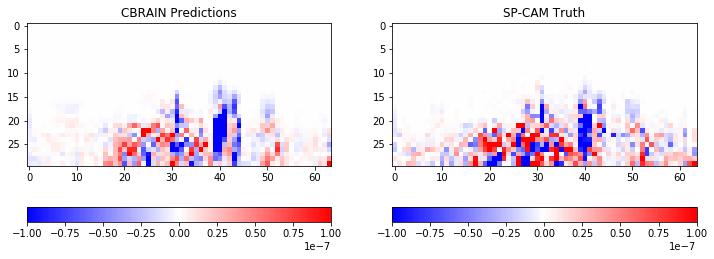

In [72]:
md1.plot_double_yz(itime=0, ilon=0, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='bwr');

In [80]:
md1.compute_stats(250)

/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics/model_diagnostics.py:130: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics/model_diagnostics.py:130: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics/model_diagnostics.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [83]:
md1.mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,-3.71541e-11,1.1815e-15,6.04666e-10,6.4182e-10,5.21822e-16,1.69917e-15,4.56007e-16,1.63538e-15,NaN,1.69917e-15,6.4182e-10,1.1815e-15,1.69303e-15,NaN
TPHYSTND,5.03162e-08,9.62059e-10,-3.1667e-07,-3.66986e-07,1.27522e-09,2.23243e-09,1.01014e-09,1.95776e-09,0.323944,2.23243e-09,-3.66986e-07,9.62059e-10,2.20762e-09,0.570998
FSNT,-0.196682,733.081,230.678,230.875,158561,159535,83146.6,83991.5,-inf,159535,230.875,733.081,106231,0.993099
FSNS,-0.220969,910.311,163.53,163.751,88477.1,89582.9,48999.3,49991.9,-inf,89582.9,163.751,910.311,62768.5,0.985497
FLNT,-0.340725,133.052,223.872,224.213,51892.9,52192.5,845.618,968.417,0.732498,52192.5,224.213,133.052,1921.18,0.930745
FLNS,-0.241143,86.0484,52.6588,52.8999,3408.96,3521.54,395.034,469.832,0.730587,3521.54,52.8999,86.0484,723.142,0.881008
PRECT,3.04287e-10,1.40149e-15,2.96383e-08,2.9334e-08,1.06999e-14,1.20157e-14,7.17144e-15,8.50926e-15,-inf,1.20157e-14,2.9334e-08,1.40149e-15,1.11552e-14,0.874364
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872618


### 002_8col_strong

```
Epoch 12/12
140152/140152 [==============================] - 4978s 36ms/step - loss: 138.8950 - mean_squared_error: 138.8950 - mass_loss: 5.9093e-10 - ent_loss: 4.2428e-10 - val_loss: 141.1937 - val_mean_squared_error: 141.1937 - val_mass_loss: 5.8705e-10 - val_ent_loss: 2.2297e-10
```

In [73]:
md2 = ModelDiagnostics('../../nn_config/002_8col_strong.yml', '/local/S.Rasp/preprocessed_data/001_valid.nc')

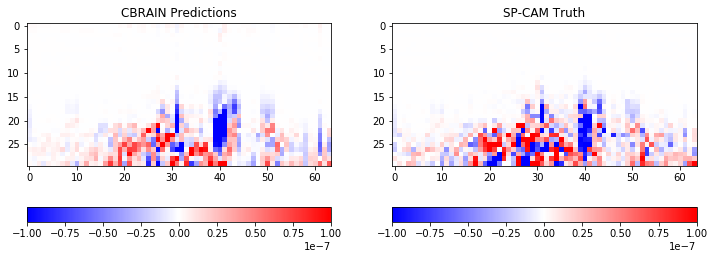

In [74]:
md2.plot_double_yz(itime=0, ilon=0, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='bwr');

In [81]:
md2.compute_stats(250)

/home/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics/model_diagnostics.py:136: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


### 003_8col_weak

```
Epoch 12/12
140152/140152 [==============================] - 4825s 34ms/step - loss: 69.9253 - mean_squared_error: 139.6934 - mass_loss: 0.2104 - ent_loss: 0.1041 - val_loss: 71.1075 - val_mean_squared_error: 142.0426 - val_mass_loss: 0.2330 - val_ent_loss: 0.1117
```

In [75]:
md3 = ModelDiagnostics('../../nn_config/003_8col_weak.yml', '/local/S.Rasp/preprocessed_data/001_valid.nc')

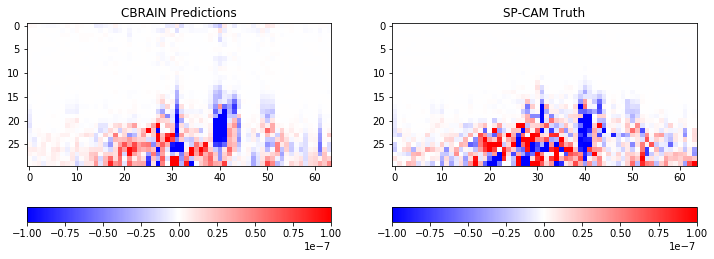

In [76]:
md3.plot_double_yz(itime=0, ilon=0, var='PHQ', vmin=-1e-7, vmax=1e-7, cmap='bwr');

In [82]:
md3.compute_stats(250)

### Compare the models

In [90]:
# Get the vertical coordinate in pressure levels
PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
P = (P[1:] + P[:-1]) / 2 / 100

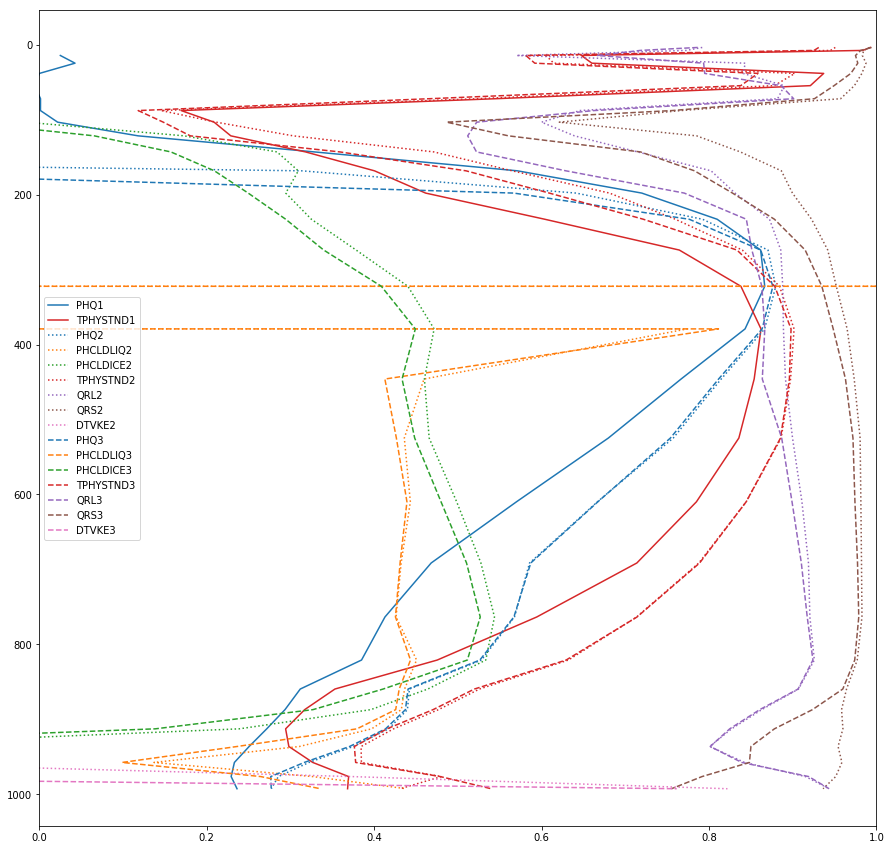

In [98]:
cols = sns.color_palette(n_colors=7)
fig, ax = plt.subplots(figsize=(15, 15))
for i, (md, sty) in enumerate(zip([md1, md2, md3], ['-', ':', '--'])):
    for v, c in zip(md2.valid_gen.output_vars[:7], cols):
        if v in md.valid_gen.output_vars:
            ax.plot(md.stats['hor_r2'][md.get_output_var_idx(v)], P, label=v+str(i+1), ls=sty, c=c)
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
    plt.legend()

In [99]:
md1.mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,-3.71541e-11,1.1815e-15,6.04666e-10,6.4182e-10,5.21822e-16,1.69917e-15,4.56007e-16,1.63538e-15,NaN,1.69917e-15,6.4182e-10,1.1815e-15,1.69303e-15,NaN
TPHYSTND,5.03162e-08,9.62059e-10,-3.1667e-07,-3.66986e-07,1.27522e-09,2.23243e-09,1.01014e-09,1.95776e-09,0.323944,2.23243e-09,-3.66986e-07,9.62059e-10,2.20762e-09,0.570998
FSNT,-0.196682,733.081,230.678,230.875,158561,159535,83146.6,83991.5,-inf,159535,230.875,733.081,106231,0.993099
FSNS,-0.220969,910.311,163.53,163.751,88477.1,89582.9,48999.3,49991.9,-inf,89582.9,163.751,910.311,62768.5,0.985497
FLNT,-0.340725,133.052,223.872,224.213,51892.9,52192.5,845.618,968.417,0.732498,52192.5,224.213,133.052,1921.18,0.930745
FLNS,-0.241143,86.0484,52.6588,52.8999,3408.96,3521.54,395.034,469.832,0.730587,3521.54,52.8999,86.0484,723.142,0.881008
PRECT,3.04287e-10,1.40149e-15,2.96383e-08,2.9334e-08,1.06999e-14,1.20157e-14,7.17144e-15,8.50926e-15,-inf,1.20157e-14,2.9334e-08,1.40149e-15,1.11552e-14,0.874364
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872618


In [100]:
md2.mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,1.49699e-11,1.0009e-15,6.5679e-10,6.4182e-10,7.00438e-16,1.69917e-15,6.34878e-16,1.63538e-15,-inf,1.69917e-15,6.4182e-10,1.0009e-15,1.69303e-15,-inf
PHCLDLIQ,9.0508e-11,4.67948e-17,1.11301e-10,2.07928e-11,3.47753e-17,8.11338e-17,3.42819e-17,8.09506e-17,-inf,8.11338e-17,2.07928e-11,4.67948e-17,8.11268e-17,-inf
PHCLDICE,4.99519e-11,8.27567e-18,4.04942e-11,-9.45772e-12,5.52836e-18,1.36421e-17,5.37628e-18,1.35463e-17,-inf,1.36421e-17,-9.45772e-12,8.27567e-18,1.36406e-17,-inf
TPHYSTND,-5.08096e-08,7.57014e-10,-4.17796e-07,-3.66986e-07,1.50606e-09,2.23243e-09,1.23699e-09,1.95776e-09,-1.77461,2.23243e-09,-3.66986e-07,7.57014e-10,2.20762e-09,0.635057
QRL,-1.74324e-08,4.22457e-11,-1.54682e-05,-1.54507e-05,6.20903e-10,6.63769e-10,2.1368e-10,2.49473e-10,-2.53814,6.63769e-10,-1.54507e-05,4.22457e-11,3.24012e-10,0.830947
QRS,6.39175e-08,6.51763e-12,8.39236e-06,8.32844e-06,3.60157e-10,3.64485e-10,1.77172e-10,1.85926e-10,-inf,3.64485e-10,8.32844e-06,6.51763e-12,2.3437e-10,0.933431
DTVKE,3.79847e-05,7.77915e-06,0.000644953,0.000606968,3.90227e-05,4.03865e-05,2.04255e-05,2.09342e-05,-1.52837e+11,4.03865e-05,0.000606968,7.77915e-06,3.09591e-05,-4.02671e+07
FSNT,-0.144924,133.832,230.73,230.875,159496,159535,83968.5,83991.5,-inf,159535,230.875,133.832,106231,0.99874
FSNS,0.147279,159.714,163.898,163.751,89533.8,89582.9,49881.4,49991.9,-inf,89582.9,163.751,159.714,62768.5,0.997456
FLNT,0.141803,14.7079,224.354,224.213,52233.2,52192.5,955.154,968.417,0.969536,52192.5,224.213,14.7079,1921.18,0.992344


In [101]:
md3.mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,-1.49831e-11,1.00681e-15,6.26837e-10,6.4182e-10,6.88514e-16,1.69917e-15,6.23658e-16,1.63538e-15,-inf,1.69917e-15,6.4182e-10,1.00681e-15,1.69303e-15,-inf
PHCLDLIQ,9.43973e-12,4.79998e-17,3.02325e-11,2.07928e-11,3.44444e-17,8.11338e-17,3.40007e-17,8.09506e-17,-inf,8.11338e-17,2.07928e-11,4.79998e-17,8.11268e-17,-inf
PHCLDICE,-7.28471e-12,9.14547e-18,-1.67424e-11,-9.45772e-12,5.45744e-18,1.36421e-17,5.32703e-18,1.35463e-17,-inf,1.36421e-17,-9.45772e-12,9.14547e-18,1.36406e-17,-inf
TPHYSTND,-8.18344e-08,7.57078e-10,-4.48821e-07,-3.66986e-07,1.47473e-09,2.23243e-09,1.20849e-09,1.95776e-09,-4.65572,2.23243e-09,-3.66986e-07,7.57078e-10,2.20762e-09,0.612893
QRL,-1.11619e-07,4.68241e-11,-1.55624e-05,-1.54507e-05,6.22986e-10,6.63769e-10,2.13768e-10,2.49473e-10,-6.69132,6.63769e-10,-1.54507e-05,4.68241e-11,3.24012e-10,0.803003
QRS,2.76263e-09,1.13314e-11,8.33121e-06,8.32844e-06,3.53139e-10,3.64485e-10,1.76369e-10,1.85926e-10,-inf,3.64485e-10,8.32844e-06,1.13314e-11,2.3437e-10,0.881018
DTVKE,6.83473e-06,1.74523e-05,0.000613803,0.000606968,4.85826e-05,4.03865e-05,2.87987e-05,2.09342e-05,-6.42494e+11,4.03865e-05,0.000606968,1.74523e-05,3.09591e-05,-1.77909e+08
FSNT,-0.00203763,138.592,230.873,230.875,159358,159535,83800.7,83991.5,-inf,159535,230.875,138.592,106231,0.998695
FSNS,-0.0239569,164.424,163.727,163.751,89398,89582.9,49823.7,49991.9,-inf,89582.9,163.751,164.424,62768.5,0.99738
FLNT,0.175805,20.5685,224.388,224.213,52253.6,52192.5,956.29,968.417,0.957625,52192.5,224.213,20.5685,1921.18,0.989294


I am a little surprised that the weak and strong constraint versions are better than the PNAS version. 